# **Image Classification using Convolutional Neural Network**
## **KARTOBI Sofiane** 

## **Import**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
# from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
# import plotly.graph_objs as go
# import plotly.figure_factory as ff
# from plotly import tools
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

## Fixing Random states

In [2]:
import tensorflow as tf 

In [3]:
# Set random seed for NumPy
np.random.seed(42)

# Set random seed for TensorFlow/Keras
tf.random.set_seed(42)

## **Loading the Fashion MNIST Dataset**

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

## **Exploring the Data**

In [5]:
print("x_train :",x_train.shape)
print("y_train :",y_train.shape)
print("x_test :",x_test.shape)
print("y_test :",y_test.shape)

x_train : (60000, 28, 28)
y_train : (60000,)
x_test : (10000, 28, 28)
y_test : (10000,)


### Creating Validation set

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

### Checking the sizes

In [7]:
print("x_train :",x_train.shape)
print("y_train :",y_train.shape)
print("x_val :",x_val.shape)
print("y_val :",y_val.shape)
print("x_test :",x_test.shape)
print("y_test :",y_test.shape)

x_train : (51000, 28, 28)
y_train : (51000,)
x_val : (9000, 28, 28)
y_val : (9000,)
x_test : (10000, 28, 28)
y_test : (10000,)


### Checking the distribution of data

In [8]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique validation labels
unique, counts = np.unique(y_val, return_counts=True)
print("\nValidation labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5101, 1: 5094, 2: 5099, 3: 5095, 4: 5076, 5: 5084, 6: 5075, 7: 5170, 8: 5095, 9: 5111}

Validation labels:  {0: 899, 1: 906, 2: 901, 3: 905, 4: 924, 5: 916, 6: 925, 7: 830, 8: 905, 9: 889}

Test labels:  {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Ploting training images

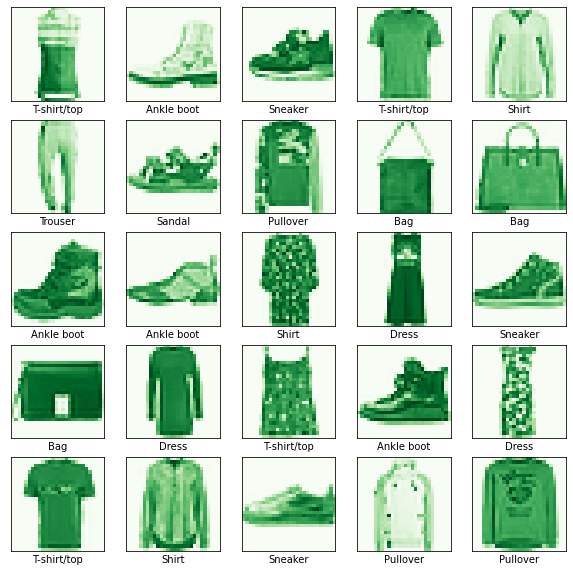

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap="Greens")
    plt.xlabel(class_names[y_train[i]])
plt.show()

### Ploting test images

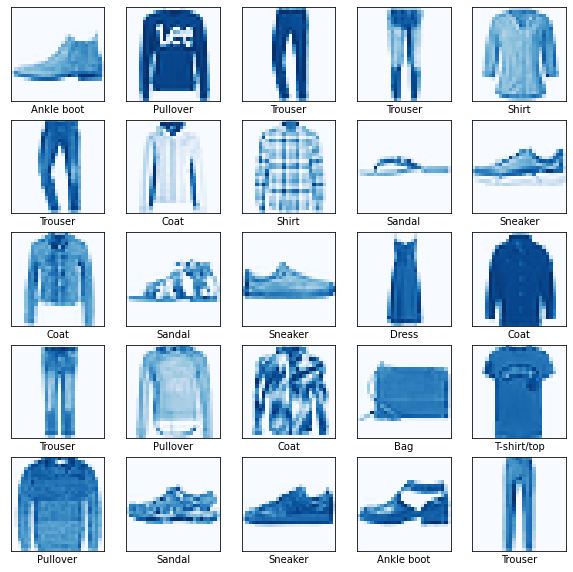

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap="Blues")
    plt.xlabel(class_names[y_test[i]])
plt.show()

## **Preprocessing the Data**

In [12]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(x_train[0].shape)
print(x_val[0].shape)
print(x_test[0].shape)

(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


### Rescaling the data

In [13]:
x_train = x_train / 255 
x_val = x_val / 255 
x_test = x_test / 255 

In [14]:
print("Minimum value is ",np.min(x_train[0]))
print("Maximum value is ",np.max(x_train[0]))

Minimum value is  0.0
Maximum value is  1.0


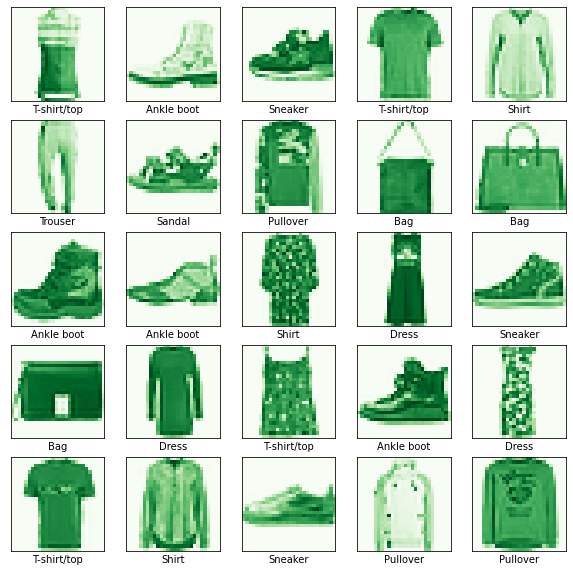

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap="Greens")
    plt.xlabel(class_names[y_train[i]])
plt.show()

### Set target to categorical 

In [16]:
from keras.utils import to_categorical

In [17]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_val= to_categorical(y_val)
y_test = to_categorical(y_test)

In [18]:
y_train[0].shape

(10,)

In [19]:
y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
x_train.shape

(51000, 28, 28, 1)

## **Building the model**

In [21]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

### **Training the model**

In [28]:
NO_EPOCHS = 20
BATCH_SIZE = 128 * 2

In [29]:
history = model.fit(x_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(x_val, y_val))

Epoch 1/20
200/200 [==============================] - 20s 99ms/step - loss: 0.2780 - accuracy: 0.9001 - val_loss: 0.2827 - val_accuracy: 0.9009
Epoch 2/20
200/200 [==============================] - 20s 98ms/step - loss: 0.2511 - accuracy: 0.9096 - val_loss: 0.2647 - val_accuracy: 0.9046
Epoch 3/20
200/200 [==============================] - 19s 97ms/step - loss: 0.2307 - accuracy: 0.9153 - val_loss: 0.2661 - val_accuracy: 0.9036
Epoch 4/20
200/200 [==============================] - 20s 100ms/step - loss: 0.2155 - accuracy: 0.9209 - val_loss: 0.2644 - val_accuracy: 0.9027
Epoch 5/20
200/200 [==============================] - 20s 99ms/step - loss: 0.1972 - accuracy: 0.9277 - val_loss: 0.2546 - val_accuracy: 0.9090
Epoch 6/20
200/200 [==============================] - 22s 109ms/step - loss: 0.1830 - accuracy: 0.9326 - val_loss: 0.2616 - val_accuracy: 0.9080
Epoch 7/20
200/200 [==============================] - 24s 122ms/step - loss: 0.1704 - accuracy: 0.9380 - val_loss: 0.2838 - val_accura

## **Testing the model**

In [30]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4154059588909149
Test accuracy: 0.9038000106811523


### Ploting Training and Validation Accuaracy

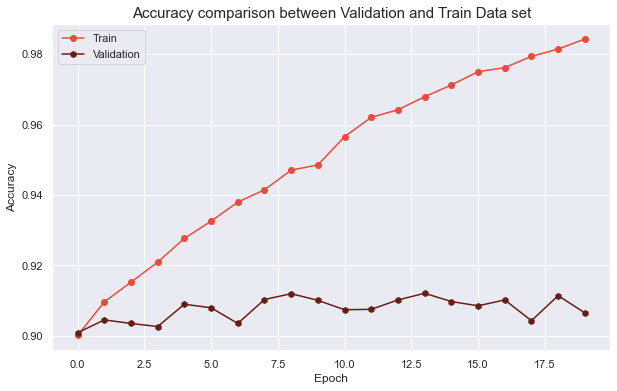

In [46]:
import seaborn as sns
sns.set()
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(history.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

### Ploting the Training and Validation Loss

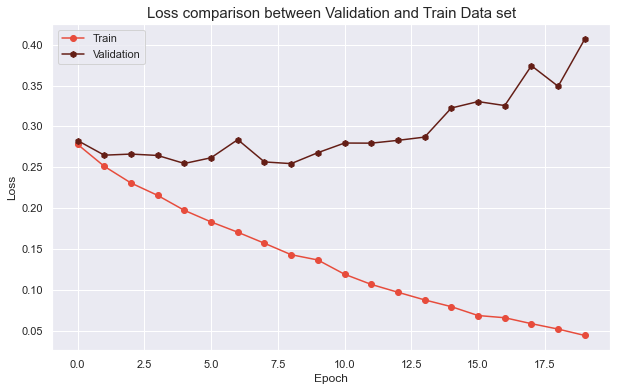

In [47]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'],color="#E74C3C",marker='o')
plt.plot(history.history['val_loss'],color='#641E16',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

#### The validation accuracy does not improve after few epochs and the validation loss is increasing after few epochs. This confirms our assumption that the model is overfitted. We will try to improve the model by adding Dropout layers

## **Adding Dropout Layer**

In [48]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)        

## **Re-train the model**

In [50]:
history = model.fit(x_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(x_val, y_val))

Epoch 1/20
200/200 [==============================] - 32s 155ms/step - loss: 0.8440 - accuracy: 0.6813 - val_loss: 0.5361 - val_accuracy: 0.8140
Epoch 2/20
200/200 [==============================] - 33s 165ms/step - loss: 0.5273 - accuracy: 0.8015 - val_loss: 0.4221 - val_accuracy: 0.8443
Epoch 3/20
200/200 [==============================] - 24s 122ms/step - loss: 0.4555 - accuracy: 0.8305 - val_loss: 0.3729 - val_accuracy: 0.8633
Epoch 4/20
200/200 [==============================] - 24s 119ms/step - loss: 0.4127 - accuracy: 0.8465 - val_loss: 0.3438 - val_accuracy: 0.8744
Epoch 5/20
200/200 [==============================] - 24s 119ms/step - loss: 0.3800 - accuracy: 0.8607 - val_loss: 0.3116 - val_accuracy: 0.8832
Epoch 6/20
200/200 [==============================] - 24s 119ms/step - loss: 0.3526 - accuracy: 0.8703 - val_loss: 0.2940 - val_accuracy: 0.8946
Epoch 7/20
200/200 [==============================] - 29s 143ms/step - loss: 0.3354 - accuracy: 0.8772 - val_loss: 0.2879 - val_ac

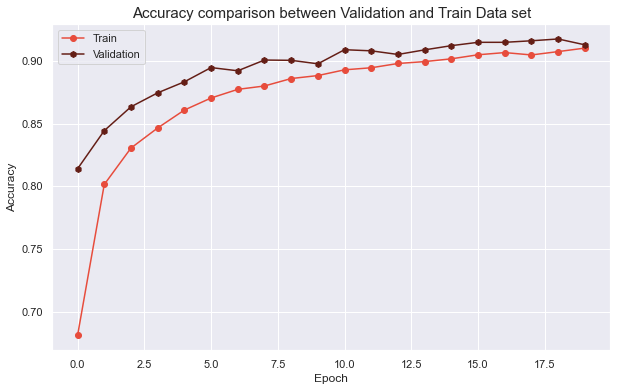

In [51]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(history.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

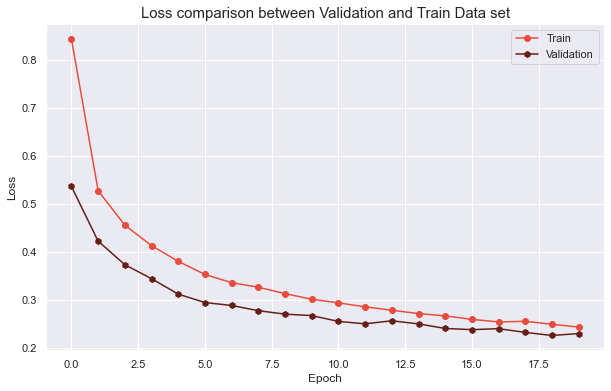

In [52]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'],color="#E74C3C",marker='o')
plt.plot(history.history['val_loss'],color='#641E16',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

## **Model Evaluation**

In [53]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2421536147594452
Test accuracy: 0.9111999869346619


In [61]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

In [54]:
y_test = np.argmax(y_test, axis=1)

## **Confusion Matrix**

In [57]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[913   0  15   9   2   2  54   0   5   0]
 [  1 977   0  13   2   0   5   0   2   0]
 [ 19   0 880  10  39   0  52   0   0   0]
 [ 19   1   8 917  20   0  33   0   2   0]
 [  3   0  40  32 849   0  76   0   0   0]
 [  0   0   0   0   0 986   0  13   0   1]
 [147   0  80  19  55   0 687   0  12   0]
 [  0   0   0   0   0   7   0 985   0   8]
 [  4   0   3   5   2   1   3   1 981   0]
 [  0   0   0   0   0  10   0  53   0 937]]


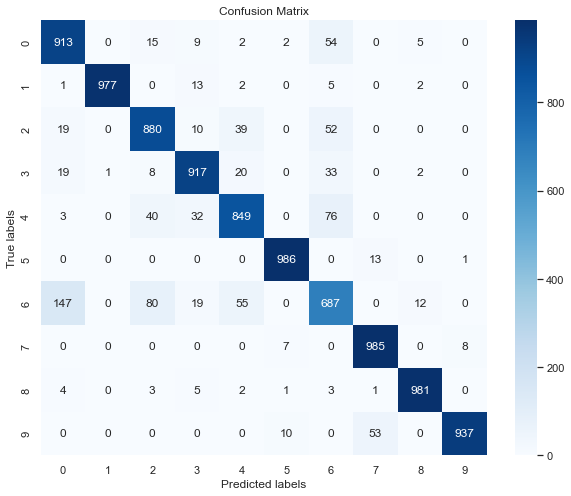

In [58]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## **Model Performance**

In [65]:
print("Correct predicted classes:",np.sum(y_pred==y_test))
print("Incorrect predicted classes:",np.sum(y_pred!=y_test))

Correct predicted classes: 9112
Incorrect predicted classes: 888


In [66]:
print(classification_report(y_test, y_pred=y_pred, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.91      0.87      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.86      0.88      0.87      1000
       Dress       0.91      0.92      0.91      1000
        Coat       0.88      0.85      0.86      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.75      0.69      0.72      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.99      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



### **Showing correclty classified image**

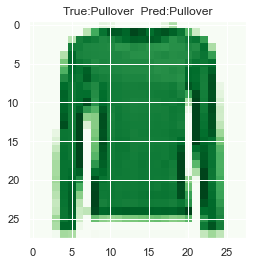

In [68]:
plt.figure()
plt.imshow(x_test[911], cmap="Greens")
plt.title("True:{}  Pred:{}".format(class_names[y_test[911]],class_names[y_pred[911]]))
plt.show()

### **Showing Incorrectly classified image**

In [86]:
a = (y_test==y_pred)
print(np.where(a == False)[0][2])


42


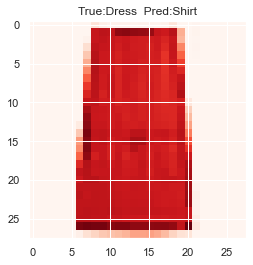

In [87]:
plt.figure()
plt.imshow(x_test[42], cmap="Reds")
plt.title("True:{}  Pred:{}".format(class_names[y_test[42]],class_names[y_pred[42]]))
plt.show()